# Problem Statement 1
Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps:

a. Import the Necessary Packages:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

b. Load the Training and Testing Data:

In [20]:
# Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
len(x_train)

60000

In [22]:
len(x_train)

60000

In [23]:
x_train.shape

(60000, 784)

In [24]:
x_test.shape

(10000, 784)

In [25]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# model = Sequential()
# model.add(Dense(512, input_shape=(28*28,), activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

c. Define the Network Architecture Using Keras:

In [26]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(28*28,)),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


d. Train the Model Using Stochastic Gradient Descent (SGD):

In [27]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
469/469 [==============================] - 4s 7ms/step - loss: 1.3122 - accuracy: 0.6644 - val_loss: 0.6237 - val_accuracy: 0.8533
Epoch 2/11
469/469 [==============================] - 3s 6ms/step - loss: 0.5068 - accuracy: 0.8696 - val_loss: 0.4091 - val_accuracy: 0.8896
Epoch 3/11
469/469 [==============================] - 3s 6ms/step - loss: 0.3914 - accuracy: 0.8913 - val_loss: 0.3476 - val_accuracy: 0.9011
Epoch 4/11
469/469 [==============================] - 3s 6ms/step - loss: 0.3456 - accuracy: 0.9022 - val_loss: 0.3191 - val_accuracy: 0.9111
Epoch 5/11
469/469 [==============================] - 3s 6ms/step - loss: 0.3177 - accuracy: 0.9093 - val_loss: 0.2964 - val_accuracy: 0.9157
Epoch 6/11
469/469 [==============================] - 3s 6ms/step - loss: 0.2972 - accuracy: 0.9149 - val_loss: 0.2804 - val_accuracy: 0.9202
Epoch 7/11
469/469 [==============================] - 3s 6ms/step - loss: 0.2807 - accuracy: 0.9199 - val_loss: 0.2664 - val_accuracy: 0.9247
Epoch 

e. Evaluate the Network:

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22668656706809998
Test accuracy: 0.9351999759674072


79/79 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.91      0.93      1032
           3       0.92      0.93      0.93      1010
           4       0.93      0.94      0.93       982
           5       0.94      0.89      0.92       892
           6       0.95      0.95      0.95       958
           7       0.94      0.93      0.94      1028
           8       0.90      0.90      0.90       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000

Actual Number:  9
Predicted Number:  9


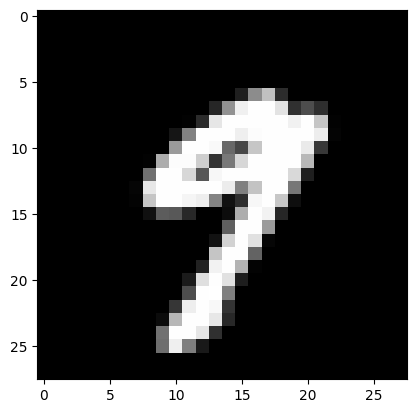

In [29]:
n = 20
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
predicted_value = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),predicted_value.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

f. Plot the Training Loss and Accuracy:

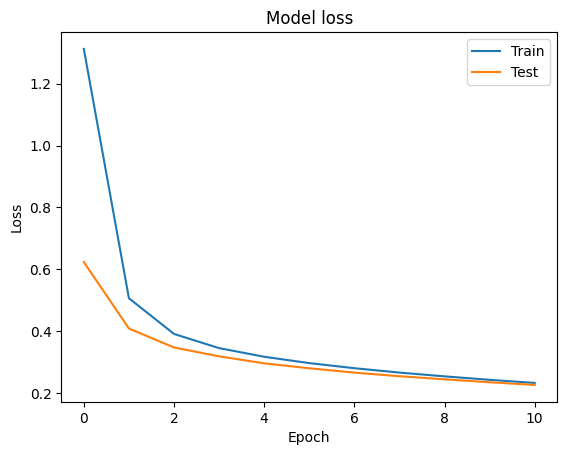

In [30]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

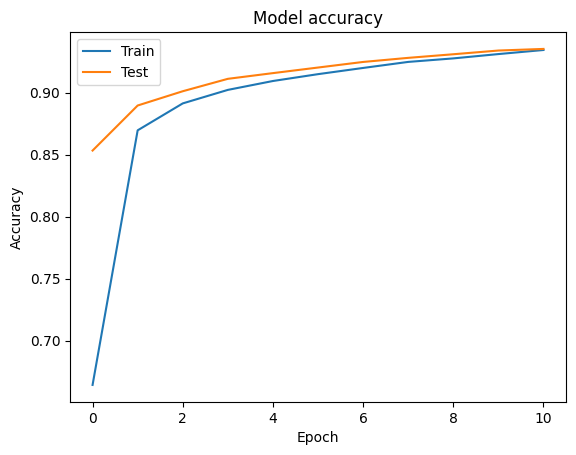

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
     